## Project Proposal for COVID19 Prediction based on symptoms
-By Sama Naz

================

### INTRODUCTION

Machine learning-based prediction of COVID-19 diagnosis based on symptoms. 
We need to predict whether a person is effected with COVID-19 or not based on symptoms.


### Problem Statement
A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ‘ABC’ government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspect ed to play an important role in the prediction of COVID19 outcome. Outcome variable is covid result test positive or negative . We have data from 11th March 2020 till 30th April 2020. Please consider 11th March till 15th April as a training and validation set. From 16th April till 30th April as a test set. Please further divide training and validation set at a ratio of 4:1.

### Aim: 
- Perform all appropriate feature engineering tasks. 
- Perform important data visualization techniques to find the pattern in data. 
- Identifying important features that may play important role to predict Covid-19.
- Perform multiple machine learning models relevant to your hypothesis.
- Perform important cost functions to justify which model is better. 

--------------------------

In [1]:
# Importing Libraries

import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To ignore warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading csv file using pandas Dataframe
df = pd.read_csv("corona_tested_006.csv")

-----------------------------

## Data understanding and Basic Exploration

In [3]:
# Unappropriate data and None converted to Nan. 
df = df.replace('\.+', np.nan, regex=True)
df = df.replace('None', np.nan, regex=True)
df = df.replace('other', np.nan, regex=True) # 'other' in Corona column is likely missing values
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [4]:
df.head(10)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
5,6,11-03-2020,True,False,False,False,False,NaN,NaN,NaN,Contact with confirmed
6,7,11-03-2020,False,False,False,False,False,negative,NaN,NaN,Other
7,8,11-03-2020,False,True,False,False,False,negative,NaN,NaN,Abroad
8,9,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
9,10,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad


In [5]:
df.tail(10)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278838,278839,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278839,278840,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278840,278841,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278841,278842,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278842,278843,30-04-2020,False,False,False,False,False,positive,NaN,NaN,Other
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,NaN,female,Other


In [6]:
df.shape

(278848, 11)

In [7]:
df.dtypes

Ind_ID                  int64
Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

In [8]:
df.drop(['Ind_ID'], axis=1, inplace=True)
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [9]:
#Renaming coloumns. 
df = df.rename(columns = {'Corona':'Corona_Test',
                          'Sex': 'Gender'})
df.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona_Test', 'Age_60_above',
       'Gender', 'Known_contact'],
      dtype='object')

In [10]:
# Summary of statistics. 
df.describe()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona_Test,Age_60_above,Gender,Known_contact
count,278848,278596,278596,278847,278847,278847,274956,151528,259285,278848
unique,51,2,2,2,2,2,2,2,2,3
top,20-04-2020,False,False,False,False,False,negative,No,female,Other
freq,10921,236368,256844,276921,277270,276433,260227,125703,130158,242741


********************************

# Feature Engineering
- Imputation (dealing with missing values)
- Encoding
- Feature Selection
- Feature scaling - this step is not suitable for the current dataset as all features are categorical which will be encoded into 0 or 1. 

_______________________

# Handling Missing Values

In [11]:
df.isnull().sum()

Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona_Test              3892
Age_60_above           127320
Gender                  19563
Known_contact               0
dtype: int64

In [12]:
missing_percentages = df.isnull().mean() * 100
missing_percentages

Test_date               0.000000
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona_Test             1.395742
Age_60_above           45.659284
Gender                  7.015650
Known_contact           0.000000
dtype: float64

In [13]:
import missingno as msno

<Axes: >

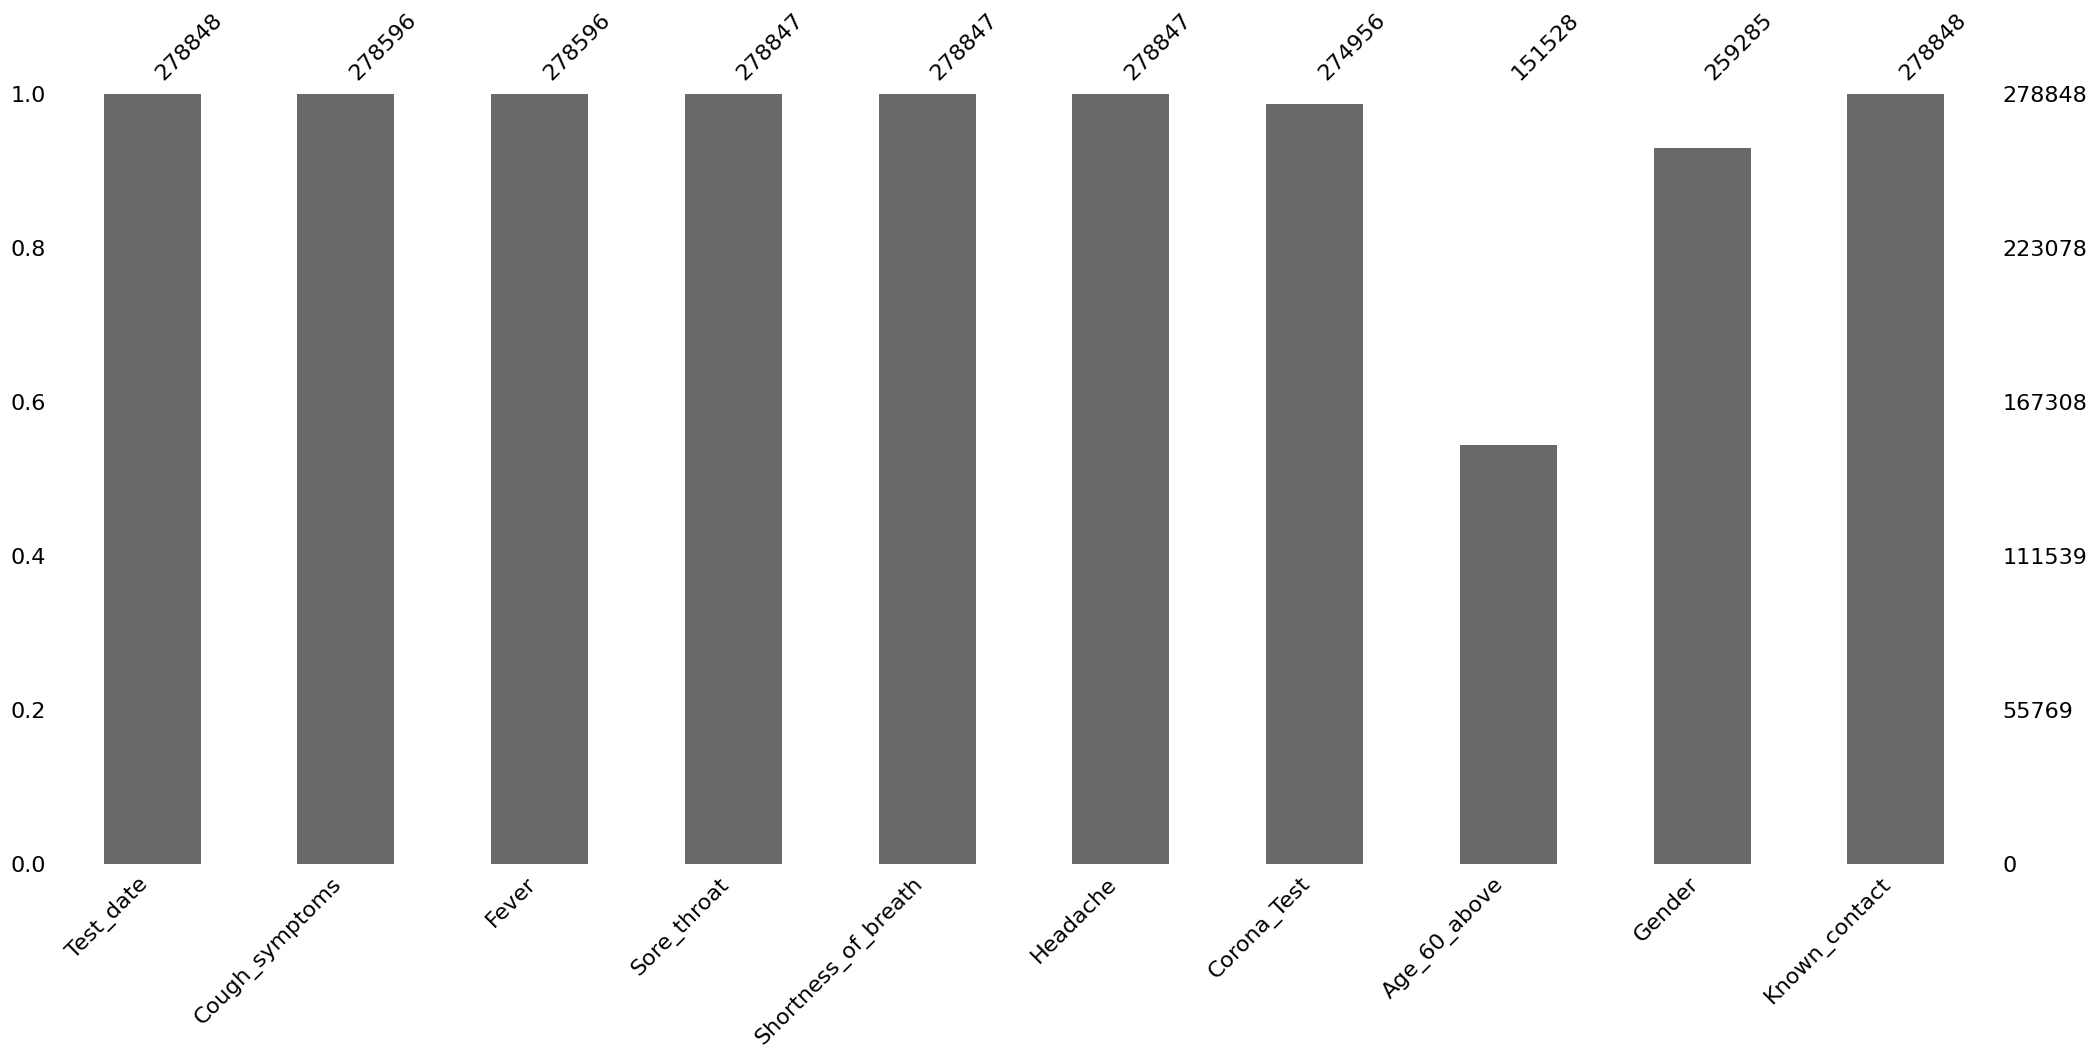

In [14]:
# creating bar plot to see the missing values
msno.bar(df)

<Axes: >

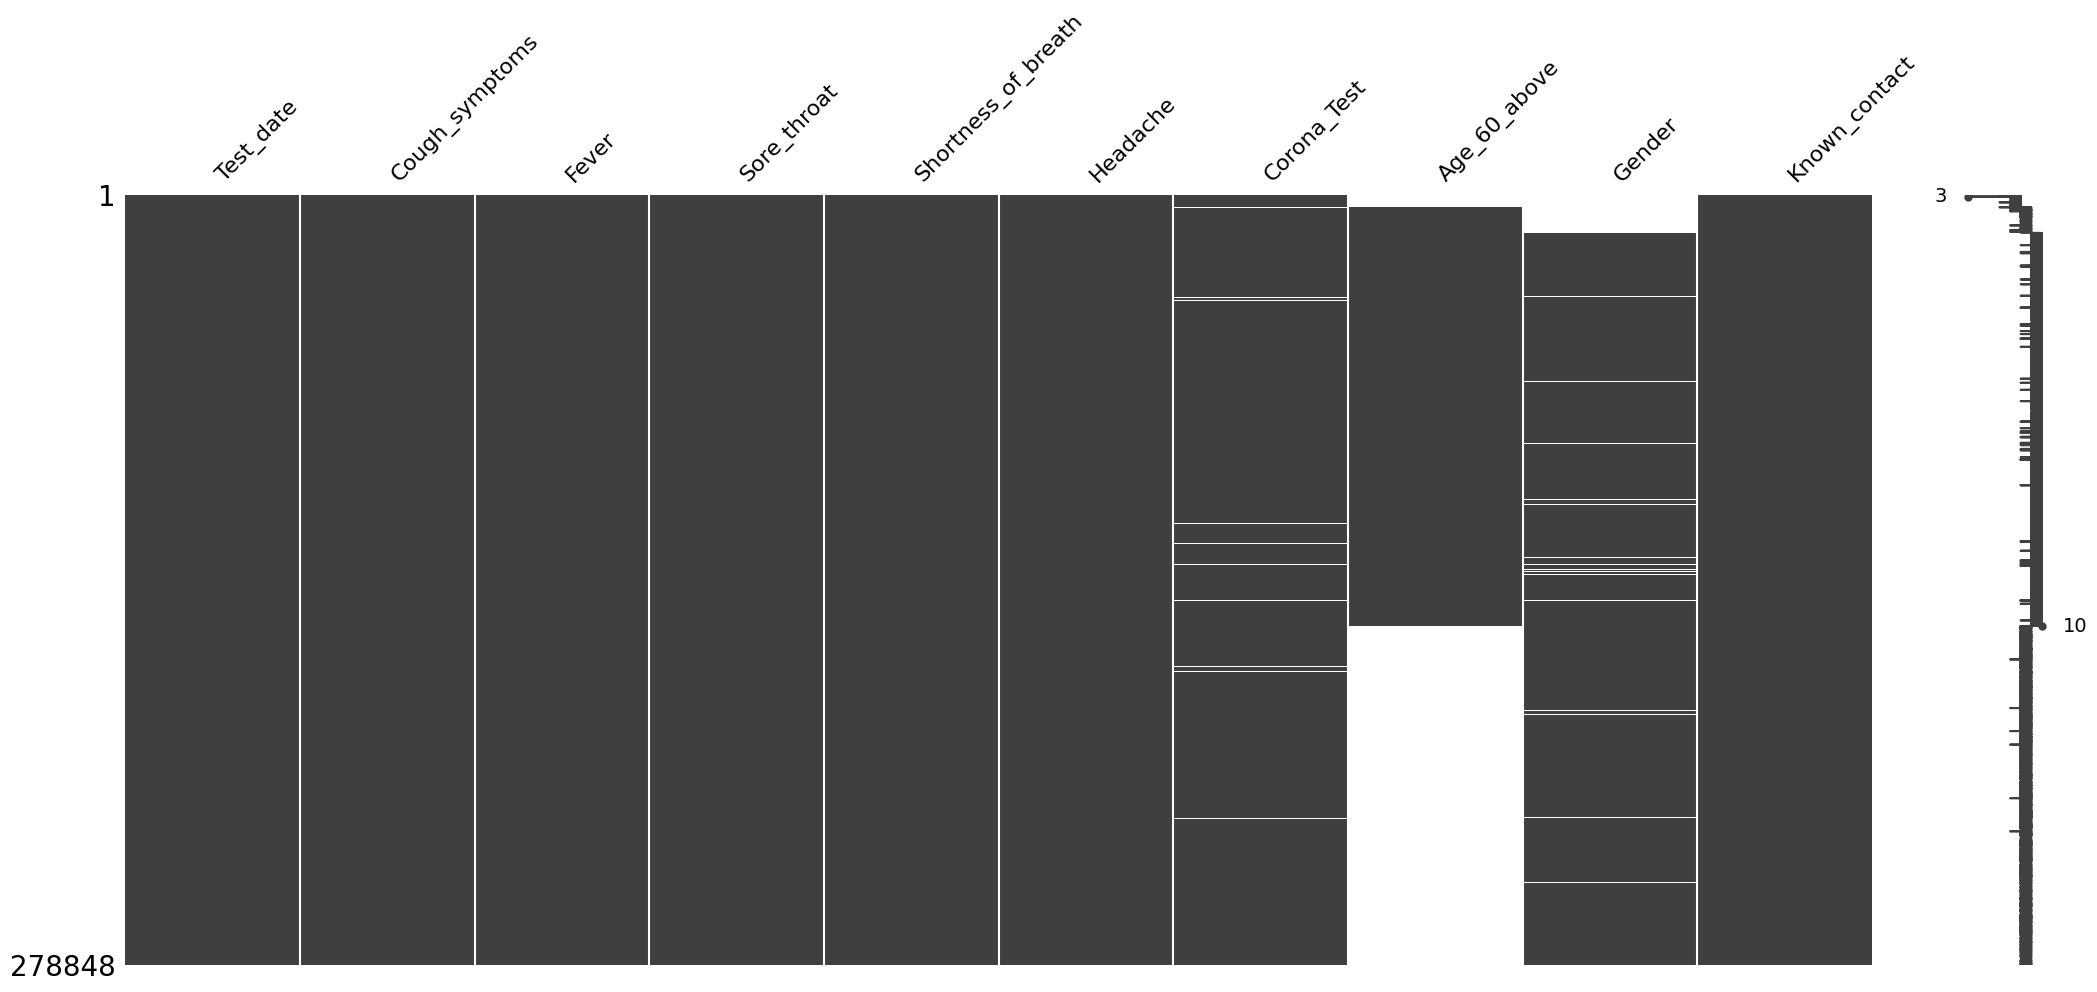

In [15]:
# creating matrix plot to see the pattern in missing values  
msno.matrix(df)

<Axes: >

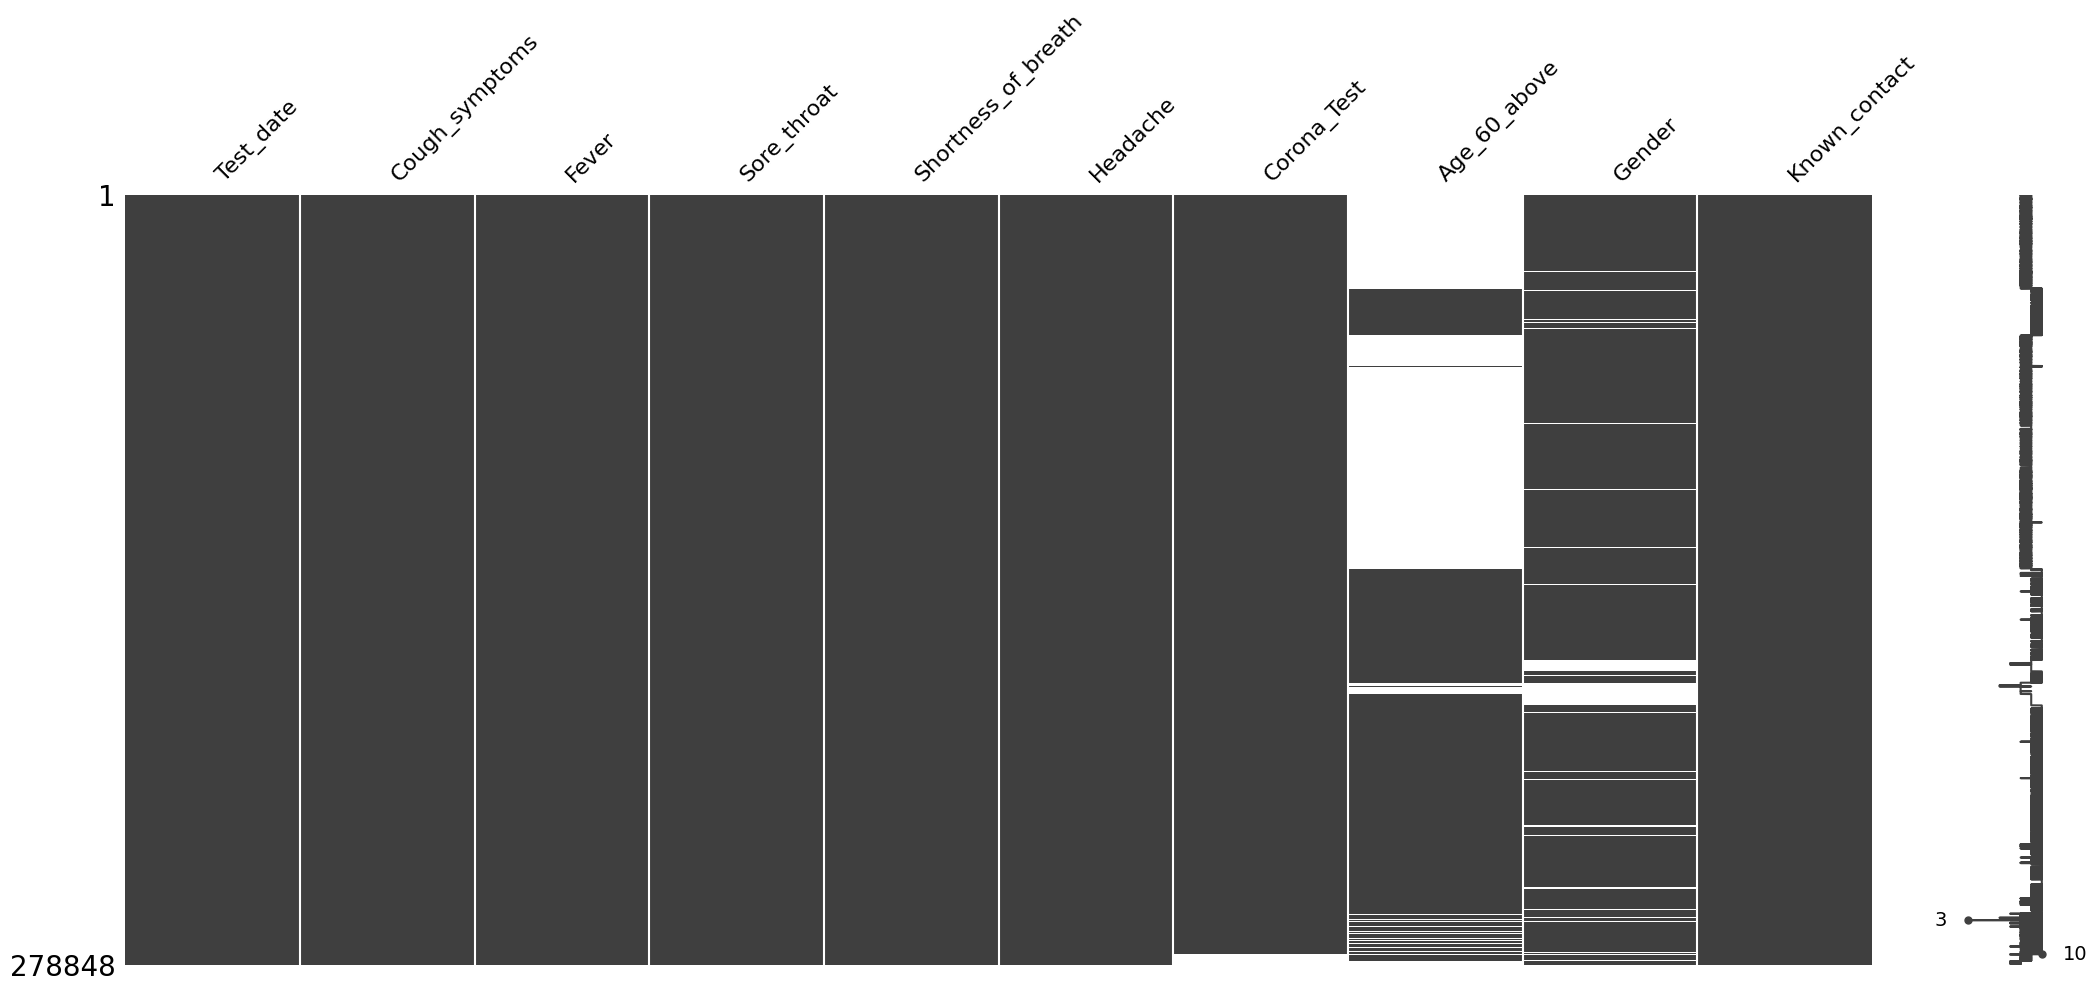

In [16]:
# Sorting the columns on the basis of Corona_test columns to see the relation between missing values. 
sorted = df.sort_values('Corona_Test')
msno.matrix(sorted)

<Axes: >

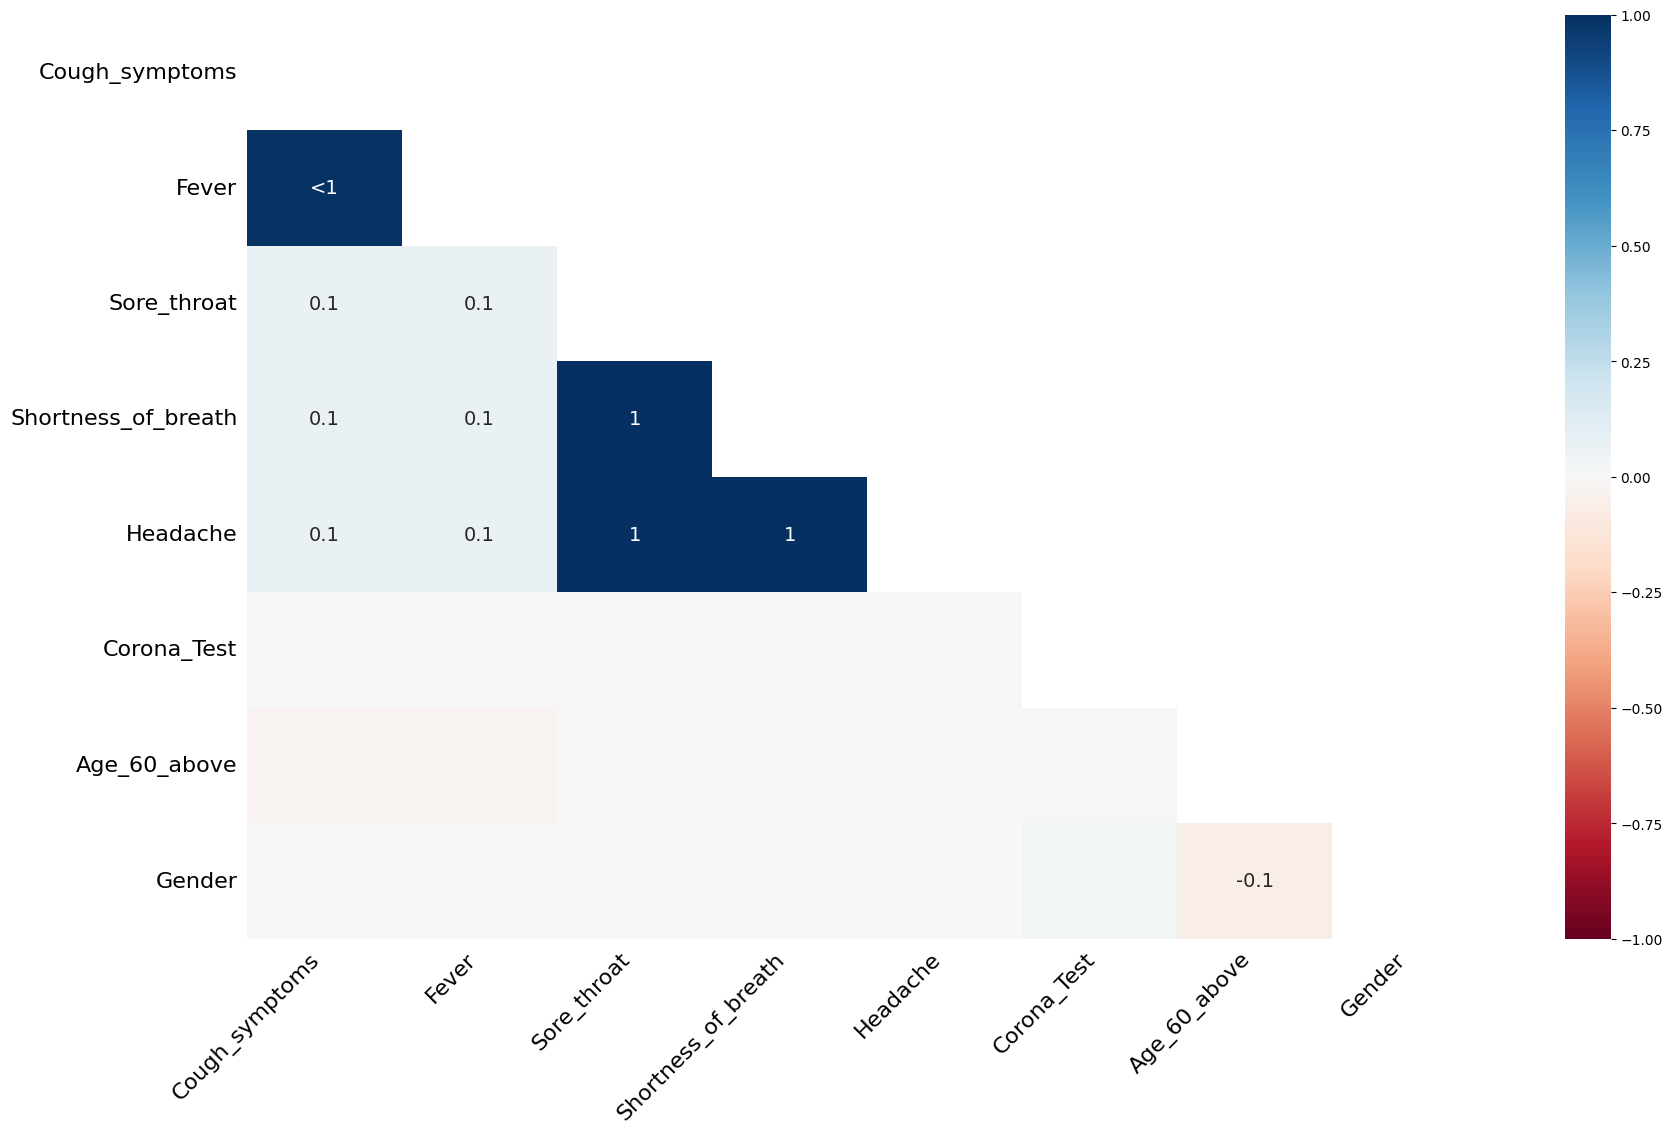

In [17]:
#Finding correlation between missing values 
msno.heatmap(df)


Observation:
*   Age_60_above and Sex columns has the maximum missing values, other columns have less missing values.
*   Either we can remove them or replace with something like mean or median or mode too.
*   As it is categorical data either we can use mode or we can use imputations like simple imputer or Knn imputer or MICE imputation
*   Corona_Test is a Target variable, so no imputation will be done, missing values will be dropped from this column.

========================================

## Replacing and Dropping values:
* Missing values from all feetures can be filled with mode of the column.
* Missing values from target variable 'Corona_Test' can be dropped as it cannot be filled. 

In [18]:
df.mode()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona_Test,Age_60_above,Gender,Known_contact
0,20-04-2020,False,False,False,False,False,negative,No,female,Other


In [19]:
#Replacing with mode
df['Cough_symptoms'].replace(np.nan,False,inplace=True)
df['Fever'].replace(np.nan,False,inplace=True)
df['Sore_throat'].replace(np.nan,False,inplace=True)
df['Shortness_of_breath'].replace(np.nan,False,inplace=True)
df['Headache'].replace(np.nan,False,inplace=True)
df['Age_60_above'].replace(np.nan,'No',inplace=True)
df['Gender'].replace(np.nan,'female',inplace=True)


In [20]:
# Dropping missing values from terget variable 'Corona_Test'
df = df.dropna()
df.isnull().sum()

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona_Test            0
Age_60_above           0
Gender                 0
Known_contact          0
dtype: int64

In [21]:
# Shape after dealing removing null values. 
df.shape

(274956, 10)

In [22]:
df["Corona_Test"].value_counts()

Corona_Test
negative    260227
positive     14729
Name: count, dtype: int64

Observation:
* From above we can see that there is no missing values in dataset. 
* To fill the missing values mode is used because as it is categorical data we can't use mean or median. 
* Missing values from target variable 'Corona_Test' is dropped. 
* After Data Cleaning, we are now left with 2,74,956 records, in which 2,60,227 patients are corona negative and 14,729 are corona positive.

----------------------

### Changing Datatypes

In [23]:
df.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona_Test', 'Age_60_above',
       'Gender', 'Known_contact'],
      dtype='object')

In [24]:

df['Test_date']=pd.to_datetime(df['Test_date'], format="%d-%m-%Y")
df['Cough_symptoms'] = df['Cough_symptoms'].astype(str)
df['Fever'] = df['Fever'].astype(str)
df['Sore_throat'] = df['Sore_throat'].astype(str)
df['Shortness_of_breath'] = df['Shortness_of_breath'].astype(str)
df['Headache'] = df['Headache'].astype(str)
df['Age_60_above'] = df['Age_60_above'].astype(str)
df['Gender'] = df['Gender'].astype(str)
df['Known_contact'] = df['Known_contact'].astype(str)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274956 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            274956 non-null  datetime64[ns]
 1   Cough_symptoms       274956 non-null  object        
 2   Fever                274956 non-null  object        
 3   Sore_throat          274956 non-null  object        
 4   Shortness_of_breath  274956 non-null  object        
 5   Headache             274956 non-null  object        
 6   Corona_Test          274956 non-null  object        
 7   Age_60_above         274956 non-null  object        
 8   Gender               274956 non-null  object        
 9   Known_contact        274956 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 23.1+ MB


In [26]:
# Making copies of the dataset
df_cleaned = df.copy()
df_sql = df.copy()

In [27]:
# saving cleaned dataset to CSV. 
df_cleaned.to_csv('df_cleaned.csv') 
df_cleaned.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona_Test,Age_60_above,Gender,Known_contact
0,2020-03-11,True,False,True,False,False,negative,No,female,Abroad
1,2020-03-11,False,True,False,False,False,positive,No,female,Abroad
2,2020-03-11,False,True,False,False,False,positive,No,female,Abroad
3,2020-03-11,True,False,False,False,False,negative,No,female,Abroad
4,2020-03-11,True,False,False,False,False,negative,No,female,Contact with confirmed


_______________________________________

## Encoding through Label Encoder

Converting Categorical values to continious values.

In [28]:
from sklearn.preprocessing import LabelEncoder # importing labelencoder

df_cleaned[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona_Test', 'Age_60_above', 'Gender', 'Known_contact']] = df_cleaned[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Corona_Test', 'Age_60_above', 'Gender', 'Known_contact']].apply(LabelEncoder().fit_transform)

df_cleaned.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona_Test,Age_60_above,Gender,Known_contact
0,2020-03-11,1,0,1,0,0,0,0,0,0
1,2020-03-11,0,1,0,0,0,1,0,0,0
2,2020-03-11,0,1,0,0,0,1,0,0,0
3,2020-03-11,1,0,0,0,0,0,0,0,0
4,2020-03-11,1,0,0,0,0,0,0,0,1


----------------------------------

# EDA

Checking correlation between variables for multicollinearity between the variables.

In [29]:
df_cleaned.corr()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona_Test,Age_60_above,Gender,Known_contact
Test_date,1.000000,-0.046902,-0.049465,-0.091943,-0.095310,-0.092128,-0.114162,-0.189674,0.089504,0.063848
Cough_symptoms,-0.046902,1.000000,0.453825,0.115436,0.106183,0.116726,0.196456,-0.007256,0.032672,-0.571565
Fever,-0.049465,0.453825,1.000000,0.122067,0.125687,0.169507,0.266268,0.016198,0.032940,-0.348195
Sore_throat,-0.091943,0.115436,0.122067,1.000000,0.195943,0.323043,0.278365,0.004412,-0.016715,-0.088762
Shortness_of_breath,-0.095310,0.106183,0.125687,0.195943,1.000000,0.202658,0.233295,0.024115,-0.013989,-0.074575
Headache,-0.092128,0.116726,0.169507,0.323043,0.202658,1.000000,0.367225,0.008756,-0.002431,-0.091801
Corona_Test,-0.114162,0.196456,0.266268,0.278365,0.233295,0.367225,1.000000,0.046949,0.022544,-0.211902
Age_60_above,-0.189674,-0.007256,0.016198,0.004412,0.024115,0.008756,0.046949,1.000000,-0.016462,0.021537
Gender,0.089504,0.032672,0.032940,-0.016715,-0.013989,-0.002431,0.022544,-0.016462,1.000000,-0.026907
Known_contact,0.063848,-0.571565,-0.348195,-0.088762,-0.074575,-0.091801,-0.211902,0.021537,-0.026907,1.000000


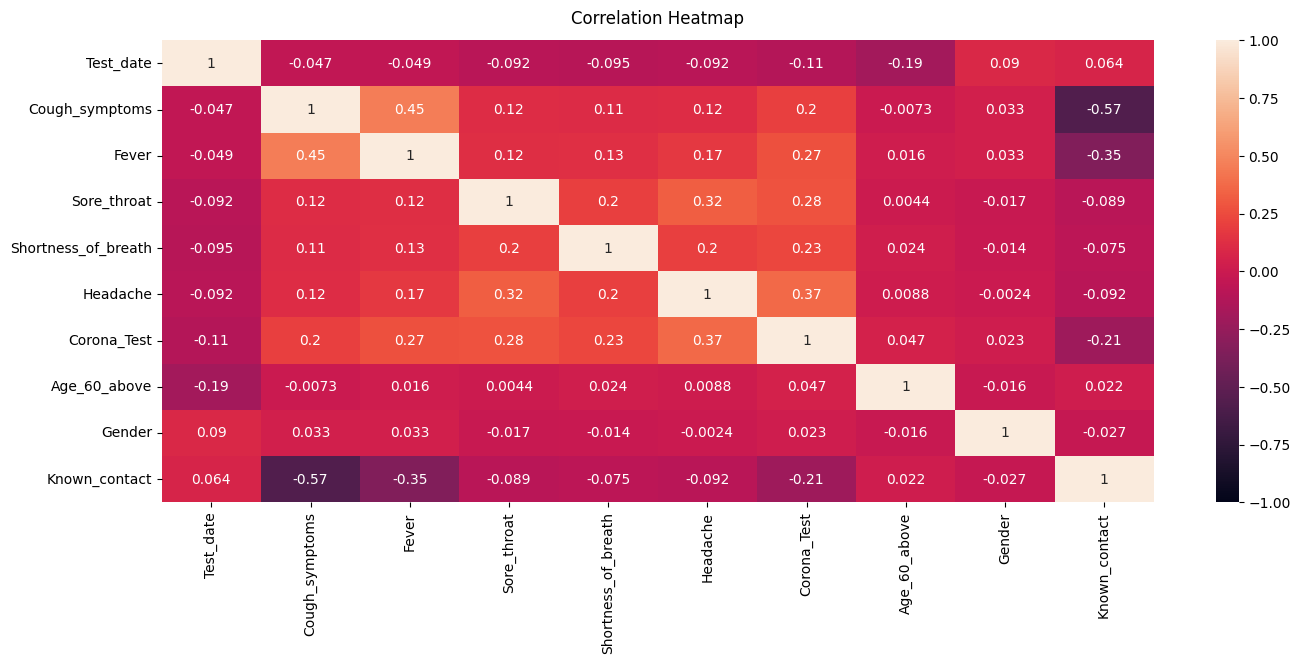

In [30]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_cleaned.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Observation:
- Cough_symptoms vs Fever has high correlation and also Sore_throat and Headache have next higher correlation in the above heatmap.
- Values which are close to zero are having less correlation
- Values which are more towards one are highly correlated

========================================

## Data Visualization

Visulaizing the dataset by using count plot. 

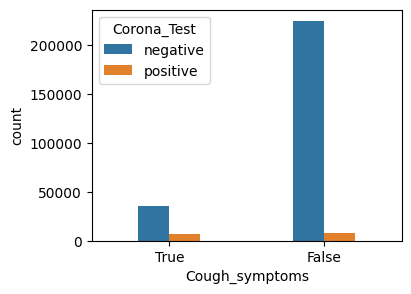

In [31]:
plt.figure(figsize=(4,3))
sns.countplot(x="Cough_symptoms", hue="Corona_Test", data=df, width=0.4)
plt.show()

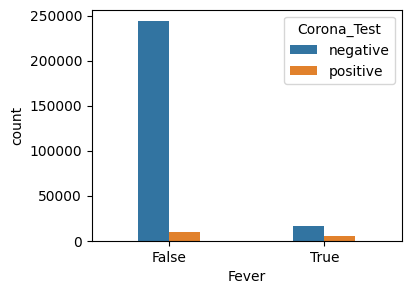

In [32]:
plt.figure(figsize=(4,3))
sns.countplot(x="Fever", hue="Corona_Test", data=df, width=0.4)
plt.show()

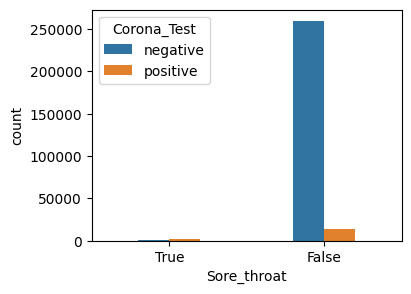

In [33]:
plt.figure(figsize=(4,3))
sns.countplot(x="Sore_throat", hue="Corona_Test", data=df, width=0.4)
plt.show()

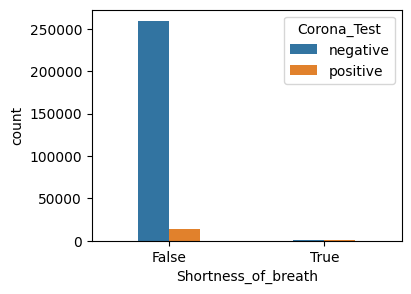

In [34]:
plt.figure(figsize=(4,3))
sns.countplot(x="Shortness_of_breath", hue="Corona_Test", data=df, width=0.4)
plt.show()

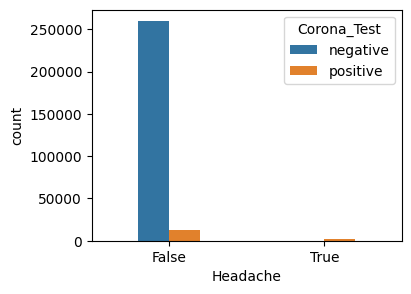

In [35]:
plt.figure(figsize=(4,3))
sns.countplot(x="Headache", hue="Corona_Test", data=df, width=0.4)
plt.show()

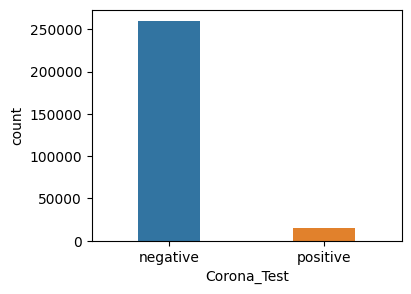

In [36]:
plt.figure(figsize=(4,3))
sns.countplot(x="Corona_Test", hue="Corona_Test", data=df, width=0.4)
plt.show()

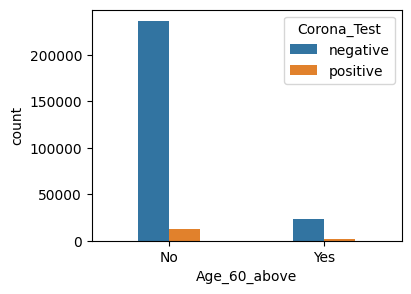

In [37]:
plt.figure(figsize=(4,3))
sns.countplot(x="Age_60_above", hue="Corona_Test", data=df, width=0.4)
plt.show()

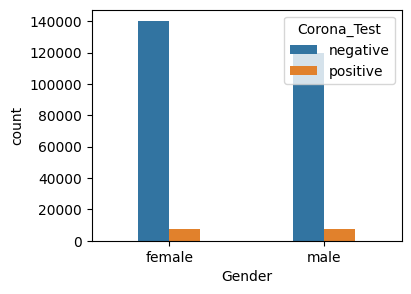

In [38]:
plt.figure(figsize=(4,3))
sns.countplot(x="Gender", hue="Corona_Test", data=df, width=0.4)
plt.show()

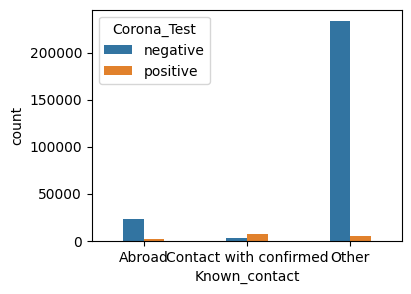

In [39]:
plt.figure(figsize=(4,3))
sns.countplot(x="Known_contact", hue="Corona_Test", data=df, width=0.4)
plt.show()


========================================

#### Bar Chat for Symptoms vs. Corona status.

In [40]:
grouped_data = df_cleaned.groupby('Corona_Test')[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']].sum().reset_index()

fig = px.bar(grouped_data, x='Corona_Test', y=['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache'],
             title='Symptoms vs. Corona status',
             labels={'value': 'Count'},
             barmode='group')

fig.show()

##### Observation: 
- From the above bar chart we can infer that Cough is the main symptom for Corona, followed by Fever and Headache. 
- Shortness_of_breath is the least common sympton in positive results.

========================================

#### Methods of infection with Pie Chart.

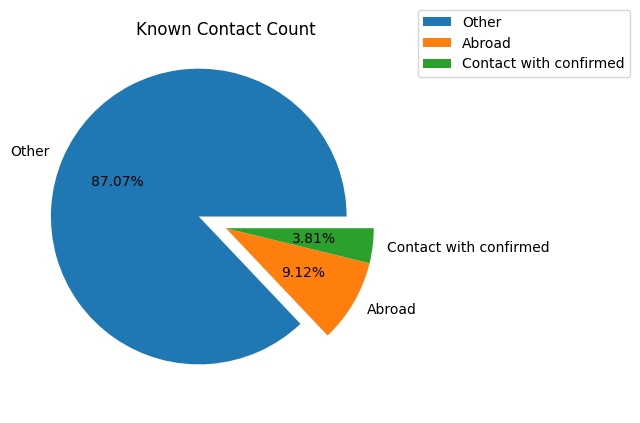

In [41]:
d = df['Known_contact'].value_counts()
v = ['Other','Abroad','Contact with confirmed']
explode = (.2,0,0)
plt.pie(d, labels= v, autopct='%1.2f%%', explode = explode)
plt.title("Known Contact Count")

# Adding legend outside the pie plot
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
# plt.legend()
plt.show()

Observation: 
- From above pieplot it is visible that knowncontact --> 'Other' is top contact for getting positive results. Other methods of infection can be many.

-----------------------------------------------

# Feature selection

This dataset has categorical input variables and categorical output.
Methods to be used:
1. Chi-Squared test
2. Mutual Information.

I have selected Chi-Squres test for this purpose.

In [42]:
from scipy.stats import chi2_contingency

target_variable = 'Corona_Test'

# Loop through each column (excluding the target variable)
for column in df_cleaned.columns:
    if column != target_variable:
        # Create a contingency table for the Chi-Square Test
        contingency_table = pd.crosstab(df_cleaned[column], df_cleaned[target_variable])

        # Perform Chi-Square Test
        chi2, p_value, dof, expected= chi2_contingency(contingency_table)

        # Print results for each column
        print(f"Chi-Square Test for {column}:")
        print(f"Chi-Square Statistic: {chi2}")
        print(f"P-Value: {p_value}")
        print("--------------------------------------")


Chi-Square Test for Test_date:
Chi-Square Statistic: 4495.025829606667
P-Value: 0.0
--------------------------------------
Chi-Square Test for Cough_symptoms:
Chi-Square Statistic: 10609.529767154772
P-Value: 0.0
--------------------------------------
Chi-Square Test for Fever:
Chi-Square Statistic: 19489.55233920404
P-Value: 0.0
--------------------------------------
Chi-Square Test for Sore_throat:
Chi-Square Statistic: 21290.644868638272
P-Value: 0.0
--------------------------------------
Chi-Square Test for Shortness_of_breath:
Chi-Square Statistic: 14951.005265593401
P-Value: 0.0
--------------------------------------
Chi-Square Test for Headache:
Chi-Square Statistic: 37061.47784842176
P-Value: 0.0
--------------------------------------
Chi-Square Test for Age_60_above:
Chi-Square Statistic: 605.3498726443743
P-Value: 1.148597033847908e-133
--------------------------------------
Chi-Square Test for Gender:
Chi-Square Statistic: 139.54358298541194
P-Value: 3.349829634729112e-32
--

Observation:
* If the p-value is less than or equal to the significance level (α), typically 0.05, we would reject the null hypothesis. 
* The Chi-Square Test results indicate that the p-values for all the variables are very close to zero (P-Value: 0.0), suggesting strong evidence
 to reject the null hypothesis of independence.
- This means that there is a significant association between each of the independent variables and the target variable (Corona).

-----------------------------------

# Train_Test_Split

In [43]:
df_cleaned.columns

Index(['Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona_Test', 'Age_60_above',
       'Gender', 'Known_contact'],
      dtype='object')

##### As per our business requirement 
- we have to take data from 11th March 2020 to 15th April 2020 for Training & Validation Set. 
- And data from 16th April to 30th april as Test Set. Then further divide training and validation set at a ratio of 4:1.

Dividing the dataset on the basis of dates.

In [44]:
df_cleaned = df_cleaned.sort_values(by='Test_date')

# Specify the date for the split
split_date = "2020-04-15"

# Create training and testing sets based on the date
train = df_cleaned[df_cleaned['Test_date'] < split_date]
test = df_cleaned[df_cleaned['Test_date'] >= split_date]

# Display the shapes of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

Training set shape: (153651, 10)
Testing set shape: (121305, 10)


In [45]:
X_train= train.drop(columns = ['Test_date', 'Corona_Test'],axis = 1)
y_train= train['Corona_Test']

X_test= test.drop(columns = ['Test_date', 'Corona_Test'],axis = 1)
y_test= test['Corona_Test']


#Train Set
print("X_train before split: {}".format(X_train.shape))
print("y_train before split: {}".format(y_train.shape))

#Test Set
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train before split: (153651, 8)
y_train before split: (153651,)
X_test shape: (121305, 8)
y_test shape: (121305,)


Further dividing the train set to train and validation set by 4:1

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val= train_test_split(X_train, y_train, test_size=0.20, random_state= 42)

print("X_train after split: {}".format(x_train.shape))
print("y_train after split: {}".format(y_train.shape))

#Validation Set
print("X_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))

X_train after split: (122920, 8)
y_train after split: (122920,)
X_val shape: (30731, 8)
y_val shape: (30731,)


In [47]:
#Train Set
print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

#Validation Set
print("X_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))

#Test Set
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (122920, 8)
y_train shape: (122920,)
X_val shape: (30731, 8)
y_val shape: (30731,)
X_test shape: (121305, 8)
y_test shape: (121305,)


--------------------------------

# Machine Learning Algorithms

 We need to predict whether Covid-19 test will be positive or negative, which is categorcial output. We will use algorithsms which are best for categorical output here.

Here we are going to use following 5 algorithms:-

1.Logistic Regression,

2.Decision Tree,

3.Random Forest,

4.SVM (Support Vector Machine)

5.K Nearest Neighbors

After comparing all algorithms we will decide which is best fit algorithm for our dataset.

## 1. Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


lr_model = LogisticRegression()

# Train the model
classification = lr_model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred = lr_model.predict(x_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training accuracy: {classification.score(x_train, y_train):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make predictions on the test set
y_test_pred = lr_model.predict(X_test)

Training accuracy: 0.9423
Validation Accuracy: 0.9426


In [49]:
#Confusion matrix 
confusion_matrix(y_test, y_test_pred)

array([[118313,     35],
       [  2945,     12]], dtype=int64)

In [50]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    118348
           1       0.26      0.00      0.01      2957

    accuracy                           0.98    121305
   macro avg       0.62      0.50      0.50    121305
weighted avg       0.96      0.98      0.96    121305



In [51]:
# Evaluate the model on test set.y_test
test_accuracy = lr_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9754


Observation: Model predicted 97.54% accuracy with Logistic Regression algorithm.

## 2. DECISION TREE Algorithm

In [52]:
from sklearn.tree import DecisionTreeClassifier


dtree_model = DecisionTreeClassifier()

# Train the model
classification = dtree_model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred = dtree_model.predict(x_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training accuracy: {classification.score(x_train, y_train):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make predictions on the test set
y_test_pred = dtree_model.predict(X_test)

Training accuracy: 0.9564
Validation Accuracy: 0.9557


In [53]:
#Confusion matrix 
confusion_matrix(y_test, y_test_pred)

array([[117977,    371],
       [  1662,   1295]], dtype=int64)

In [54]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    118348
           1       0.78      0.44      0.56      2957

    accuracy                           0.98    121305
   macro avg       0.88      0.72      0.78    121305
weighted avg       0.98      0.98      0.98    121305



In [55]:
# Evaluate the model on test set.y_test
test_accuracy = dtree_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9832


Observation: Model predicted 98.32% accuracy with Decision Tree algorithm.

## 3. Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier


rforest_model = RandomForestClassifier()

# Train the model
classification = rforest_model.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred = rforest_model.predict(x_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training accuracy: {classification.score(x_train, y_train):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make predictions on the test set
y_test_pred = rforest_model.predict(X_test)

Training accuracy: 0.9564
Validation Accuracy: 0.9560


In [57]:
#Confusion matrix 
confusion_matrix(y_test, y_test_pred)

array([[117973,    375],
       [  1662,   1295]], dtype=int64)

In [58]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    118348
           1       0.78      0.44      0.56      2957

    accuracy                           0.98    121305
   macro avg       0.88      0.72      0.78    121305
weighted avg       0.98      0.98      0.98    121305



In [59]:
# Evaluate the model on test set.y_test
test_accuracy = rforest_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9832


Observation: Model predicted 98.32% accuracy with Random Forest algorithm.

## 4. SVM (Support Vector Machine)

In [60]:
from sklearn.svm import SVC

svm = SVC()

# Train the model
classification = svm.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred = svm.predict(x_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training accuracy: {classification.score(x_train, y_train):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make predictions on the test set
y_test_pred = svm.predict(X_test)

Training accuracy: 0.9556
Validation Accuracy: 0.9562


In [61]:
#Confusion matrix 
confusion_matrix(y_test, y_test_pred)

array([[117973,    375],
       [  1662,   1295]], dtype=int64)

In [62]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    118348
           1       0.78      0.44      0.56      2957

    accuracy                           0.98    121305
   macro avg       0.88      0.72      0.78    121305
weighted avg       0.98      0.98      0.98    121305



In [63]:
# Evaluate the model on test set.y_test
test_accuracy = svm.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9832


Observation: Model predicted 98.32% accuracy with SVM algorithm.

## 5. K Nearest Neighbors (KNN) Algorithm

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

# Train the model
classification = knn.fit(x_train, y_train)

# Make predictions on the validation set
y_val_pred = knn.predict(x_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training accuracy: {classification.score(x_train, y_train):.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Make predictions on the test set
y_test_pred = knn.predict(X_test)

Training accuracy: 0.9452
Validation Accuracy: 0.9456


In [65]:
#Confusion matrix 
confusion_matrix(y_test, y_test_pred)

array([[117633,    715],
       [  1945,   1012]], dtype=int64)

In [66]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    118348
           1       0.59      0.34      0.43      2957

    accuracy                           0.98    121305
   macro avg       0.78      0.67      0.71    121305
weighted avg       0.97      0.98      0.98    121305



In [67]:
# Evaluate the model on test set.y_test
test_accuracy = knn.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9781


Observation: Model predicted 98.05% accuracy with KNN algorithm.

--------------------------------------------------------------

## Accuracy_Score Observation
Accuracy of our 5 Algorithms:- 

Logistic Regression = 97.54%

Decision Tree = 98.32%

Random Forest = 98.32%

SVM (Support Vector Machine) = 98.32%

K Nearest Neighbors Algorithms = 98.05%   

From above results we can observe that accuracy of our 5 Algorithms are very close to each other. If we compare all then we can conclude that 'Decision Tree', 'Random Forest' or SVM (Support Vector Machine) Algorithm are best for our Covid-19 dataset.

### Visualising accuracy of our ML Algorithms

In [68]:
# Visualisation of our ML algorithms

fig = px.bar(x = ['Logistic Regression','Decision Tree', 'Random Forest', 'SVM (Support Vector Machine)', 'K-Nearest Neighbors'],
             y = [97.54, 98.32, 98.32, 98.32, 98.05],
             text = [97.54, 98.32, 98.32, 98.32, 98.05],
             labels = {'x': 'Machine Learning Algorithms', 'y':'Accuracy (%)'},
             title = "Acccuracy Percentage of Machine Learning Algorithms",
             color = ['Logistic Regression','Decision Tree', 'Random Forest', 'SVM (Support Vector Machine)', 'K-Nearest Neighbors'],
            color_discrete_sequence=['pink', 'red', 'green', 'blue', 'yellow' ])
fig.show()

========================================

##  Cost Function: Binary Cross-Entropy Loss (Log Loss) and AUC_ROC_Score

In [69]:
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score

models = [lr_model, knn, svm, dtree_model, rforest_model]

for model in models:
    if hasattr(model, "predict_proba"):
        # Model produces probability estimates
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        log_loss_value = log_loss(y_test, y_pred_proba)
        accuracy = accuracy_score(y_test, model.predict(X_test))
        auc_roc = roc_auc_score(y_test, y_pred_proba)

        print(f"Model: {type(model).__name__}")
        print(f"Log Loss: {log_loss_value}")
        print(f"Accuracy: {accuracy}")
        print(f"AUC-ROC: {auc_roc}")
        print("-" * 30)
    else:
        print(f"Model {type(model).__name__} does not produce probability estimates.")


Model: LogisticRegression
Log Loss: 0.11665856292387622
Accuracy: 0.9754338238324883
AUC-ROC: 0.7715650875788511
------------------------------
Model: KNeighborsClassifier
Log Loss: 0.3600058423546571
Accuracy: 0.9780718024813486
AUC-ROC: 0.8027981357582179
------------------------------
Model SVC does not produce probability estimates.
Model: DecisionTreeClassifier
Log Loss: 0.07809802475943044
Accuracy: 0.9832405918964593
AUC-ROC: 0.8301112089154219
------------------------------
Model: RandomForestClassifier
Log Loss: 0.07805237979648887
Accuracy: 0.9832076171633486
AUC-ROC: 0.8301114332299536
------------------------------


##### Observation
Log Loss:
- A Log Loss of 0 would mean a perfect match between predicted probabilities and actual labels.
- Our models have Log loss of 0.1 value on average the predicted probabilities from the models are relatively close to the true labels.
- Decision tree and Random Forest have the lowest 0.078 log loss value. 


AUC-ROC (Area Under the Receiver Operating Characteristic curve) can be interpreted as follows:
- AUC-ROC = 0.5: The model performs no better than random chance.
- AUC-ROC > 0.5: The model has some discriminatory power. The higher the value, the better the model's ability to separate the classes.
- AUC-ROC = 1.0: Perfect discrimination. The model perfectly distinguishes between positive and negative instances.

Here all models have AUC_ROC 0.76 to .83, which means they have discriminatory power.

========================================

## Model evaluation and optimization in machine learning : CV_Score

In [70]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = 5

# Initialize a KFold object for splitting the data
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Logistic Regression
logistic_cv_scores = cross_val_score(lr_model, x_train, y_train, cv=kf)
print("Logistic Regression Cross-Validation Scores:", logistic_cv_scores)
print(f"Mean CV Score (Logistic Regression): {logistic_cv_scores.mean():.2f}")
print(f"Standard Deviation (Logistic Regression): {logistic_cv_scores.std():.2f}")

# Decision Tree
dt_cv_scores = cross_val_score(dtree_model, x_train, y_train, cv=kf)
print("\nDecision Tree Cross-Validation Scores:", dt_cv_scores)
print(f"Mean CV Score (Decision Tree): {dt_cv_scores.mean():.2f}")
print(f"Standard Deviation (Decision Tree): {dt_cv_scores.std():.2f}")

# Random Forest
rf_cv_scores = cross_val_score(rforest_model, x_train, y_train, cv=kf)
print("\nRandom Forest Cross-Validation Scores:", rf_cv_scores)
print(f"Mean CV Score (Random Forest): {rf_cv_scores.mean():.2f}")
print(f"Standard Deviation (Random Forest): {rf_cv_scores.std():.2f}")

# SVM (Support Vector Machine)
svm_cv_scores = cross_val_score(svm, x_train, y_train, cv=kf)
print("\nSVM Cross-Validation Scores:", svm_cv_scores)
print(f"Mean CV Score (SVM): {svm_cv_scores.mean():.2f}")
print(f"Standard Deviation (SVM): {svm_cv_scores.std():.2f}")

# K-Nearest Neighbors (KNN)
knn_cv_scores = cross_val_score(knn, x_train, y_train, cv=kf)
print("\nK-Nearest Neighbors Cross-Validation Scores:", knn_cv_scores)
print(f"Mean CV Score (KNN): {knn_cv_scores.mean():.2f}")
print(f"Standard Deviation (KNN): {knn_cv_scores.std():.2f}")

Logistic Regression Cross-Validation Scores: [0.94024569 0.94333713 0.94240156 0.94325578 0.94199479]
Mean CV Score (Logistic Regression): 0.94
Standard Deviation (Logistic Regression): 0.00

Decision Tree Cross-Validation Scores: [0.95521477 0.95554019 0.95712659 0.95631305 0.95554019]
Mean CV Score (Decision Tree): 0.96
Standard Deviation (Decision Tree): 0.00

Random Forest Cross-Validation Scores: [0.95525545 0.95562154 0.95724862 0.95684185 0.9557029 ]
Mean CV Score (Random Forest): 0.96
Standard Deviation (Random Forest): 0.00

SVM Cross-Validation Scores: [0.95472665 0.95521477 0.95619102 0.9562317  0.9551741 ]
Mean CV Score (SVM): 0.96
Standard Deviation (SVM): 0.00

K-Nearest Neighbors Cross-Validation Scores: [0.95086235 0.94589977 0.95403514 0.94679466 0.95000814]
Mean CV Score (KNN): 0.95
Standard Deviation (KNN): 0.00


Observation
- All modes consistently performs well across different subsets of the data, as evidenced by the high mean cross-validation score of 0.94 to 0.96.
- A standard deviation of zero (0.00) in cross-validation scores usually indicates that the model's performance is consistent across different folds of the cross-validation process. In other words, the model is consistently making predictions with very similar accuracy across all subsets of the data.

#### Visualisation of CV_Score

In [71]:

# Defining the models and their respective cross-validation scores
models = ['Logistic Regression','Decision Tree', 'Random Forest', 'SVM (Support Vector Machine)', 'K-Nearest Neighbors']
cv_scores = [logistic_cv_scores, dt_cv_scores, rf_cv_scores, svm_cv_scores, knn_cv_scores]

# Calculate mean and standard deviation for each model
mean_scores = [scores.mean() for scores in cv_scores]

# Create a DataFrame for plotting
import pandas as pd
df = pd.DataFrame({'Models': models, 'Mean CV Score': mean_scores})

# Create a bar chart using Plotly
fig = px.bar(df, x='Models', y='Mean CV Score', text='Mean CV Score',
             title='Cross-Validation Scores',
             labels={'Models': 'Models', 'Mean CV Score': 'Mean CV Score'})

# Customize the layout
fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Models', yaxis_title='Mean CV Score')
fig.update_xaxes(type='category')

# Show the plot
fig.show()

========================================

# CONCLUSION:

#### After testing Covid-19 dataset with different algorithms. I have came to the conclusion that Random Forest is the best fit model for our dataset. Among 5 models tested:
- 3 models have the highest Accuracy_Score of 98.32% : Decision Tree, Random Forest, SVM (Support Vector Machine)
- 2 models have lowest Log Loss of 0.0787 : Decision Tree, Random Forest
- 2 models have highest AUC-ROC of 0.83 : Decision Tree, Random Forest
- Further analysed through cross_validation score, Random Forest Model has the highest CV_Score of 95.61%.
----------------------------------------------------------------------------------------------------------

## Testing our ML model to predict result


Random Forest Model is the best fit model so we will try to predict on that.
- 'Cough_symptoms' (TRUE = 1 , FALSE = 0)
- 'FEVER' (TRUE = 1 , FALSE = 0)
- 'Sore_throat' (TRUE = 1 , FALSE = 0)
- 'Shortness_of_breath' (TRUE = 1 , FALSE = 0)
- 'Headache' (TRUE = 1 , FALSE = 0)
- Age_60_above (No=0 , Yes = 1)
- Sex (Female=0, Male=1)
- Known_contact (Abroad=0, Contact with confirmed = 1, other = 2)

And output is 
- Corona (Positive =1 , Negative = 0)

In [72]:
# Input data with random values
input_data = (1,1,0,1,0,0,1,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# fro Random Forest algorithm
prediction = rforest_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is corona negative')
else:
  print('The person is corona positive')

[1]
The person is corona positive


------------------------------------------

====================================================                 THANK YOU           ================================================